## Problem Statement-
Performing Data Cleaning and EDA on the Adult Census Income Dataset.
- By Anuroop Arya

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Import Dataset

In [2]:
df = pd.read_csv("adult.csv")

### Preview/Investigate Dataset

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Dataset Overview:
This dataset contains demographic information about individuals, including age, type of employment, education, marital status, occupation, relationship status, race, gender, capital gains and losses, hours worked per week, native country, and income level. It is suitable for various data analysis and modeling tasks.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### Observation - 1
The dataset is complete with no missing values, ensuring data integrity. It incorporates essential integer features such as Age, Final Weight, Education Number, Capital Gain, Capital Loss, and Hours Per Week. However, no floating-point data is present.

Conversely, categorical attributes such as Workclass, Education, Marital Status, Occupation, Relationship, Race, Sex, Native Country, and Income are represented as object types.

Notably, the dataset reveals occurrences of '?' values, necessitating imputation for accurate analysis. To summarize, the dataset is robust in terms of completeness, encompassing both integer and categorical variables, while requiring attention to address the presence of '?' values.

In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.shape 

(32561, 15)

### Observation-2

The dataset encompasses individuals aged 19 to 90 years, with an average age of 37. Their educational journey spans 1 to 16 years, with an average education duration of 10 years. An atypical maximum capital gain value of 99999 raises concerns about data accuracy. In terms of work hours, individuals labor anywhere from 1 to 99 hours weekly, with a mean of 40 hours.

Key Statistics:

Age: Range 19-90, Average 37
Education: Years spent range 1-16, Average level 10
Capital Gain: Unusual max value of 99999, potential data error
Hours per Week: Range 1-99, Average 40

In [8]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

### Data Cleaning

#### Replacing '?' with NaN

In [9]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

#### Converting the Categorical to appropriate data types

In [11]:
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for col in categorical_cols:
    df[col] = df[col].astype('category')

#### Convert age and education-num to numeric data types

In [12]:
df['age'] = df['age'].astype(int)
df['education.num'] = df['education.num'].astype(int)

df.info()

#### Dropping duplicates values

In [13]:
df = df.drop_duplicates()

#### Drop irrelevant columns

In [14]:
df = df.drop(['fnlwgt'], axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32537 non-null  int32   
 1   workclass       32537 non-null  category
 2   education       32537 non-null  category
 3   education.num   32537 non-null  int32   
 4   marital.status  32537 non-null  category
 5   occupation      32537 non-null  category
 6   relationship    32537 non-null  category
 7   race            32537 non-null  category
 8   sex             32537 non-null  category
 9   capital.gain    32537 non-null  int64   
 10  capital.loss    32537 non-null  int64   
 11  hours.per.week  32537 non-null  int64   
 12  native.country  32537 non-null  category
 13  income          32537 non-null  object  
dtypes: category(8), int32(2), int64(3), object(1)
memory usage: 1.7+ MB


#### Handling Outliers

In [16]:
#columns to handle outliers
numeric_cols = ['age', 'education.num', 'capital.gain', 'hours.per.week']

#Outlier handling strategy for each column
outlier_handling = {
    'age': 'winsorize',
    'education.num': 'transform',
    'capital.gain': 'remove',
    'hours.per.week': 'winsorize'
}

#### Remove, Transform and Winsorize

In [17]:
#Apply the corresponding outlier handling strategy
for col in numeric_cols:
    strategy = outlier_handling[col]

    if strategy == 'remove':
   
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    elif strategy == 'transform':
   
        df[col] = np.log1p(df[col])
    elif strategy == 'winsorize':

        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29825 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             29825 non-null  float64 
 1   workclass       29825 non-null  category
 2   education       29825 non-null  category
 3   education.num   29825 non-null  float64 
 4   marital.status  29825 non-null  category
 5   occupation      29825 non-null  category
 6   relationship    29825 non-null  category
 7   race            29825 non-null  category
 8   sex             29825 non-null  category
 9   capital.gain    29825 non-null  int64   
 10  capital.loss    29825 non-null  int64   
 11  hours.per.week  29825 non-null  float64 
 12  native.country  29825 non-null  category
 13  income          29825 non-null  object  
dtypes: category(8), float64(3), int64(2), object(1)
memory usage: 1.8+ MB
None


## Exploratory Data Analysis

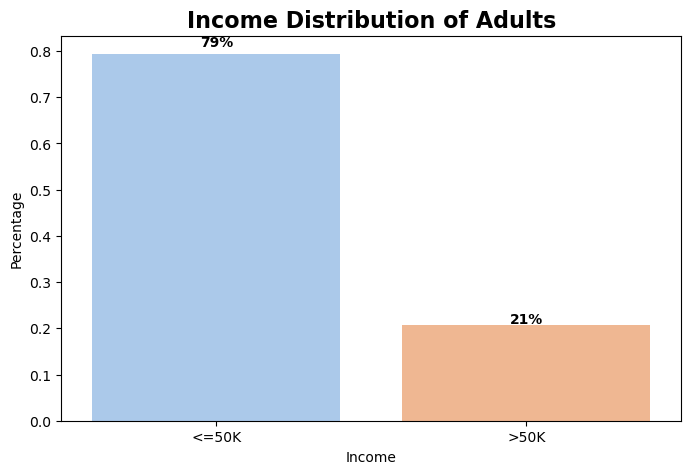

In [19]:
sns.set_palette("pastel")
plt.figure(figsize=(8, 5))
plt.title('Income Distribution of Adults', fontsize=16, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize=True).rename_axis('Income').reset_index(name='Percentage')

ax = sns.barplot(x='Income', y='Percentage', data=eda_percentage.head(10))
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')



In [20]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

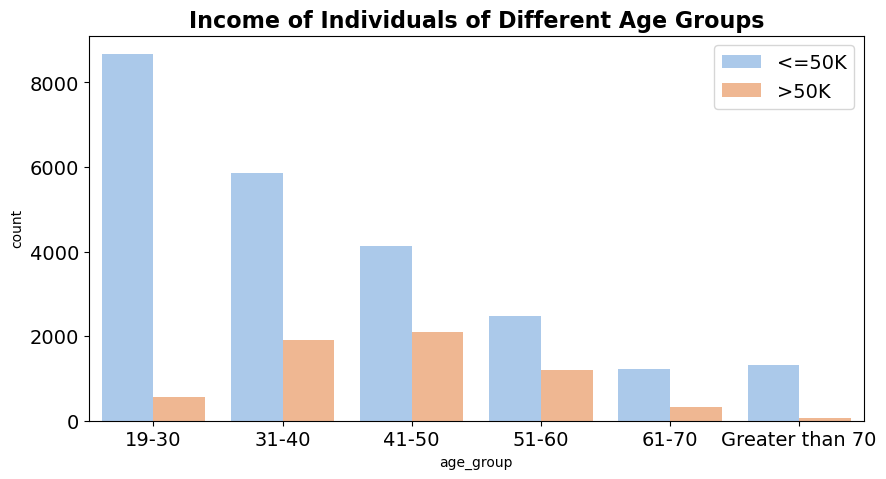

In [21]:
plt.figure(figsize=(10, 5))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.set_palette("pastel")  # Using a pastel color palette with light shades of green
sns.countplot(x='age_group', hue='income', data=df, order=order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)


In my analysis, a captivating trend emerges concerning income and age. With a rising age, there's a discernible surge in the population earning over 50K dollars. Intriguingly, the 19-30 age bracket showcases a relatively lower ratio of individuals earning beyond 50K. In contrast, the 41-50 and 51-60 age groups exhibit a noteworthy parity between those earning more and less.

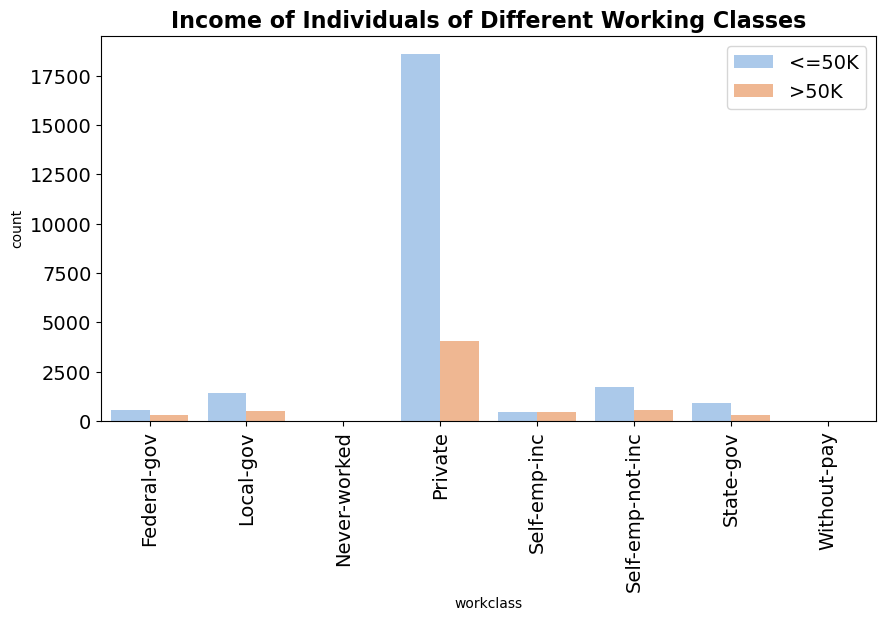

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(x='workclass', hue='income', data=df)
plt.title('Income of Individuals of Different Working Classes', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

After analyzing the data, I found interesting patterns when examining the incomes of adults based on their working classes. Notably, being **Self-Employed** stands out as the category where more individuals earn more than 50K dollars, possibly suggesting that successful self-employment can lead to higher earnings. Conversely, in the **Private Sector**, the majority of individuals earn less than 50K dollars, highlighting a significant income disparity. Meanwhile, the **Federal Government** category shows a relatively balanced distribution of income levels. It is important to acknowledge that the **Without-Pay** and **Never-Worked** categories have limited data available.

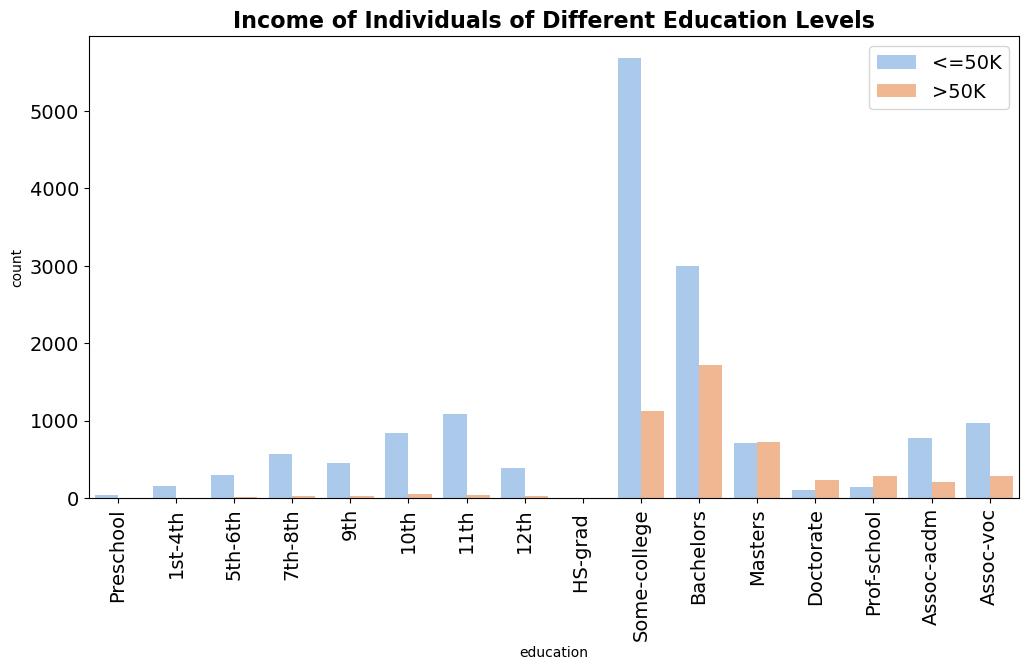

In [23]:
plt.figure(figsize=(12,6))
order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 
              'Assoc-acdm', 'Assoc-voc']
sns.countplot(x = 'education', hue = 'income', data = df, order= order_list)
plt.title('Income of Individuals of Different Education Levels', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

During my analysis, I discovered intriguing trends regarding education levels and incomes. Individuals who completed education up to **12th Standard** have a majority earning below **50K dollars per year**, while those with higher education levels such as **Bachelors, Masters, Doctorate, and Prof-school** exhibit a greater number of people earning **more than 50K dollars** annually. However, for those with **Assoc-acad or Assoc-voc** qualifications, the proportion of individuals earning **more than 50K dollars** is relatively low.

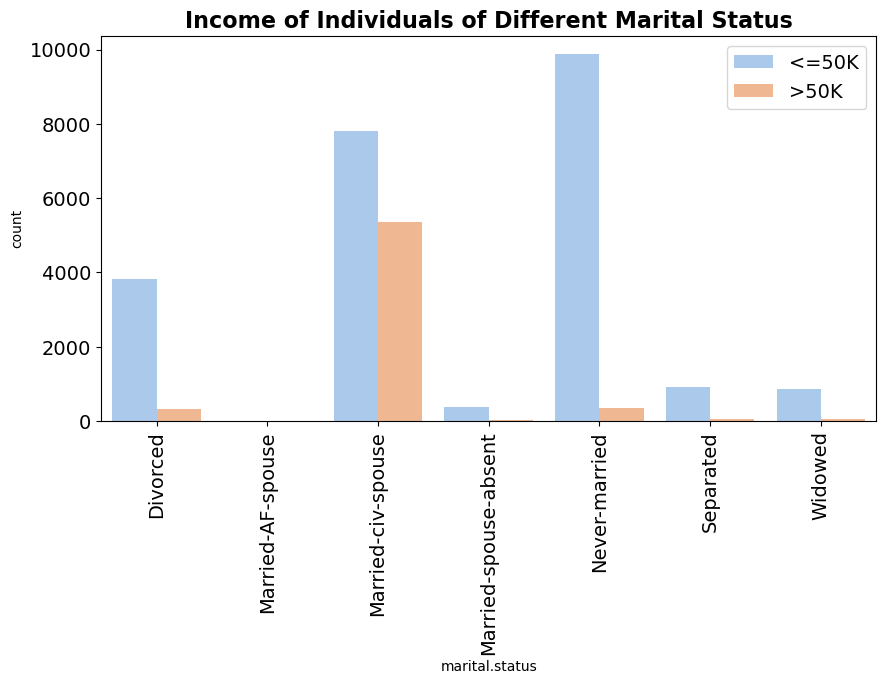

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'marital.status', hue = 'income', data = df)
plt.title('Income of Individuals of Different Marital Status', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

An important observation to highlight is that within the marital status categories, only **Married-civ-spouse** shows a relatively balanced distribution of individuals across both income groups. However, for the other marital status categories, the percentage of adults earning more than 50K dollars annually is less than 25%.

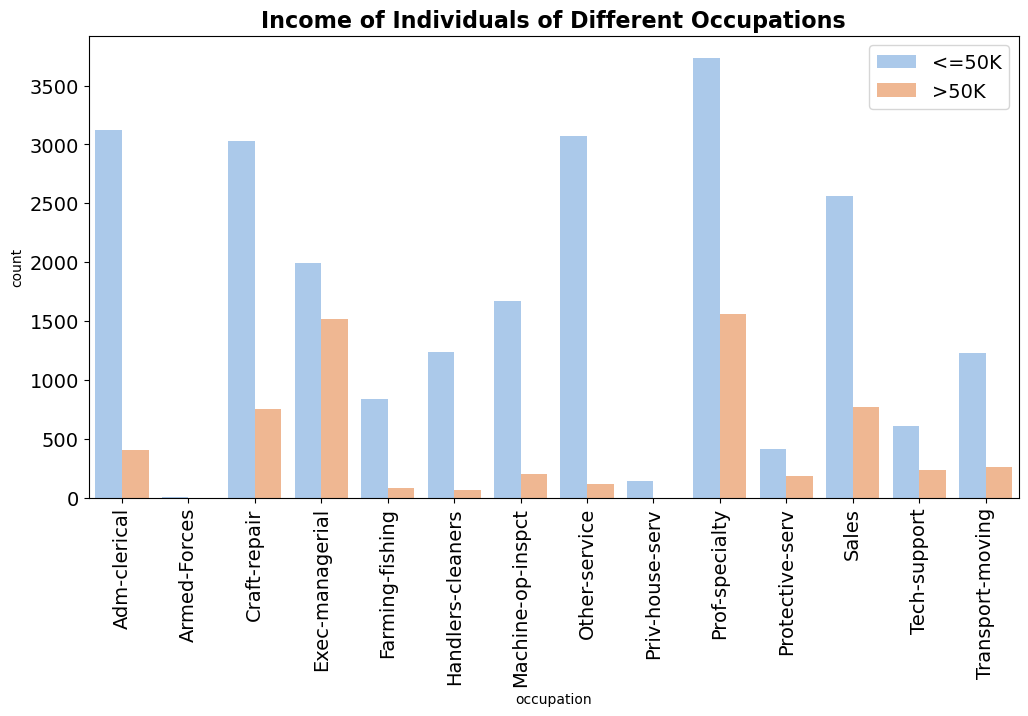

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(x= 'occupation', hue = 'income', data = df)
plt.title('Income of Individuals of Different Occupations', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

Based on my analysis, adults in **Exec-managerial** roles exhibit an an almost likelihood of earning more than 50K dollars per year. In contrast, individuals in occupations such as **Prof-specialty** have a approximately a 33% probability of earning above the 50K threshold. However, those working in occupations like **Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, and Transport-moving** are less likely to earn more than 50K dollars annually. Additionally, approximately 25% of individuals in the **Sales** occupation earn above 50K dollars per year.

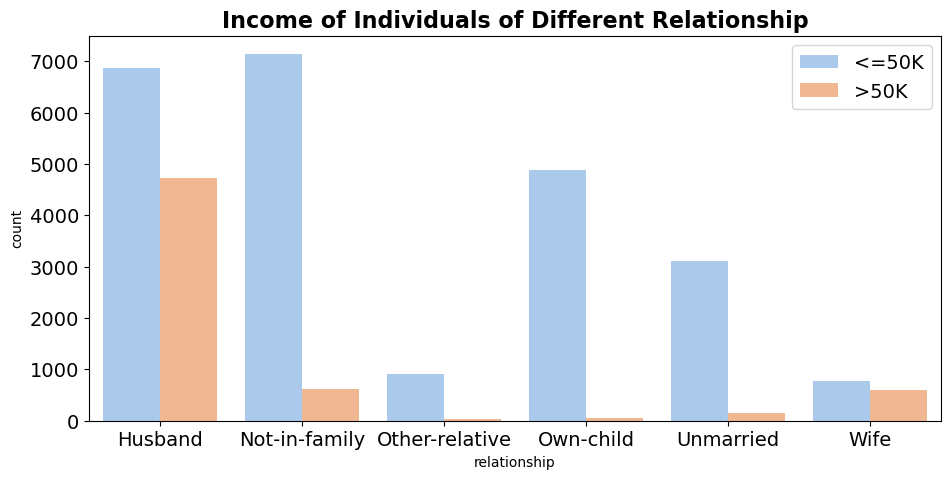

In [26]:
plt.figure(figsize=(11,5))
sns.countplot(x = 'relationship', hue = 'income', data = df)
plt.title('Income of Individuals of Different Relationship', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

In my analysis, I observed that **wives** have an equal likelihood of earning more than 50K dollars annually. Conversely, for **husbands**, although a significant proportion falls into this category, the possibility of earning above 50K dollars per year is comparatively lower. Additionally, the number of **unmarried** individuals earning more than 50K dollars annually is quite small.

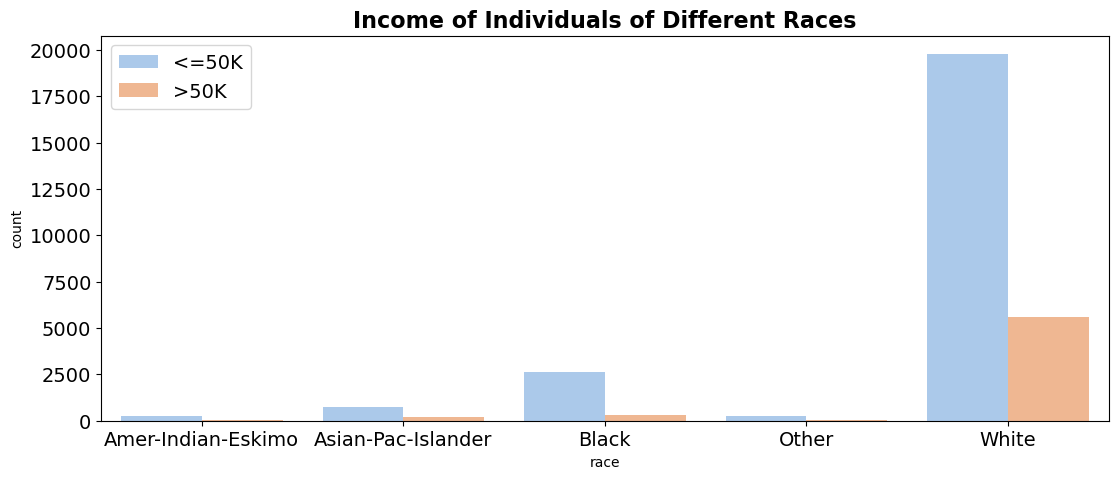

In [27]:
plt.figure(figsize=(13,5))
sns.countplot(x = 'race', hue = 'income', data = df)
plt.title('Income of Individuals of Different Races', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

One crucial point to note is that, with the exception of the **White** race, the dataset has a sparse representation of individuals from other races. This lack of diversity may limit the ability to determine the precise percentage and relationship of individuals earning more than 50K dollars annually for those races.

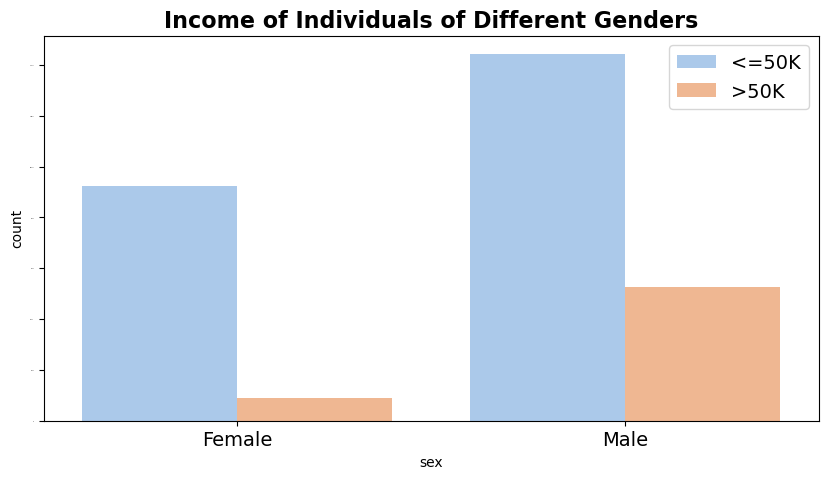

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'sex', hue = 'income', data = df)
plt.title('Income of Individuals of Different Genders', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=1)
plt.legend(fontsize=14)

In the dataset, a significant earnings gap between males and females is evident. Less than 10% of females earn more than 50K dollars per year, while approximately 33% of males surpass this income threshold.

In [29]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


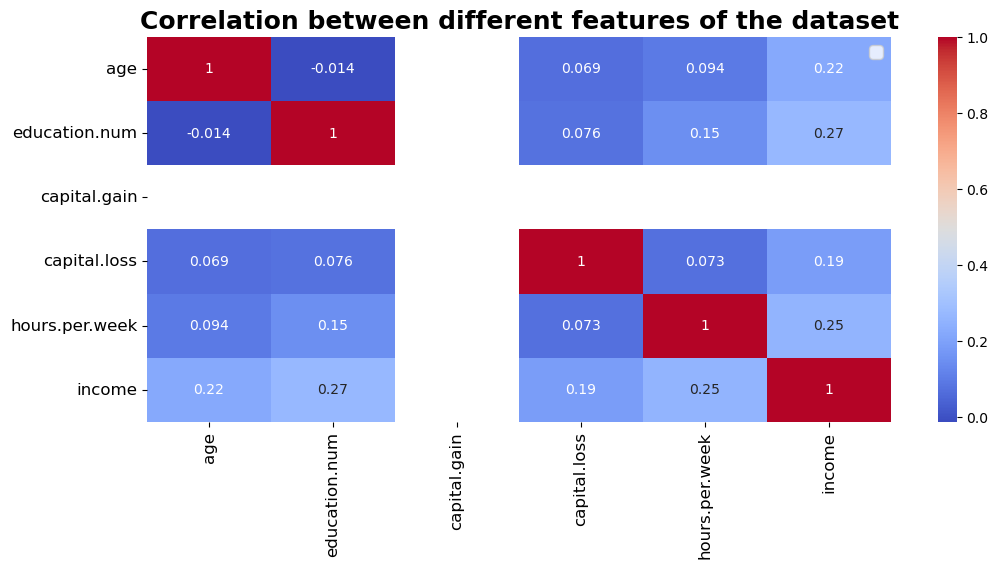

In [31]:
plt.figure(figsize=(12, 5))
plt.title("Correlation between different features of the dataset", fontsize=18, fontweight='bold')
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  # Changing the color palette to "coolwarm"
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)


In my analysis, I created a **correlation map** to explore the relationship between the independent features and the dependent feature, which is the **income variable**. The map revealed that most of the features demonstrate a **positive correlation** with income. However, it is crucial to acknowledge that this correlation graph does not encompass the **object datatypes** present in the dataset.

## Conclusion

In this notebook, our objective was to understand the Adult Census Income dataset available on Kaggle. We accomplished this by performing data cleaning, preparation, and exploratory data analysis (EDA) specifically focused on categorical data using histograms. Through our analysis and the creation of histograms, we were able to gain better insights into the income distribution across different categories. Our EDA process provided us with valuable information about the dataset itself, further enhancing our understanding of its characteristics and patterns.